## Estadistica Aplicada
Sesión 2 - 11 septiembre

Jorge Sebastian Aguirre Jimenez 1947870

G41

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
ejercicio_km=pd.read_excel('Ejercicio_KM.xlsx')

In [6]:
ejercicio_km.head()

,Individuo,Tiempo,Evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [9]:
## estimar mode Kaplan-Meier

km1=KaplanMeierFitter().fit(ejercicio_km['Tiempo'],ejercicio_km['Evento'])

In [10]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,20,20
6.0,4,3,1,0,20
7.0,1,1,0,0,16
9.0,1,0,1,0,15
10.0,2,1,1,0,14
11.0,1,0,1,0,12
13.0,1,1,0,0,11
17.0,1,0,1,0,10
19.0,1,0,1,0,9


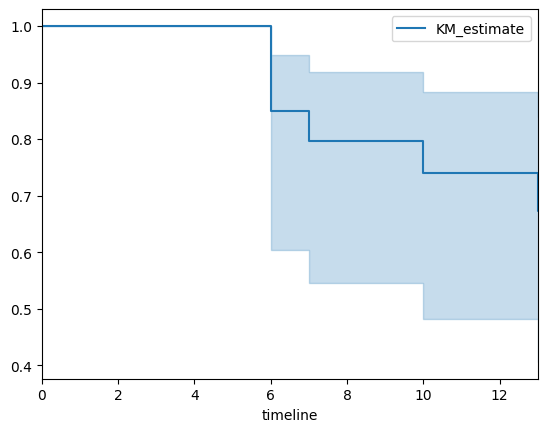

In [11]:
km1.plot_survival_function()
plt.xlim(0,13);

In [13]:
km1.median_survival_time_

inf

Deberia salir 23

Significa que en el tiempo 23 a la mitad de los individuos les ha ocurrido el evento

In [17]:
relacion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [19]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Los datos de relacion corresponden al tiempo de supervivencia de una relacion, el tiempo que pasa desde que inicia la relación hasta que termina. El tiempo esta medido en semanas y esta en la columna "t". En la variable estado 1 significa que el evento ocurrio y 0 que hay censura. En la variable tratamiento 1 es "detallista" y 0 "No detallista". En esta base detallista es quien hizo por lo menos un regalo semanal a su pareja (flores, peluche, paleta, etc)

In [20]:
km_all=KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

<Axes: xlabel='timeline'>

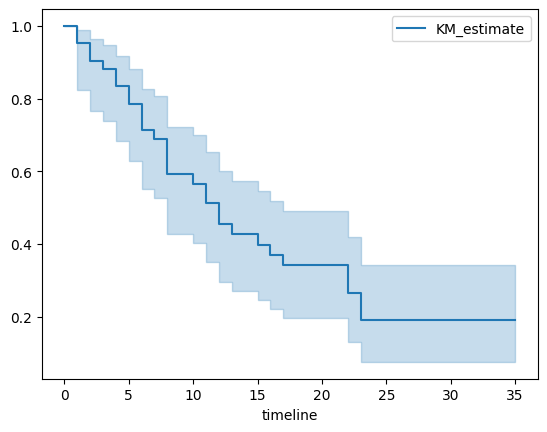

In [21]:
km_all.plot_survival_function()

In [22]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad de las relaciones terminaron

In [23]:
## separar por tratamiento
detallistas=relacion.query('tratamiento==1')
no_detallistas=relacion.query('tratamiento==0')

In [24]:
# estimar el modelo
km_deta=KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nodeta=KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

Text(0.5, 1.0, 'Funcion de supervivencia de Kaplan Meier')

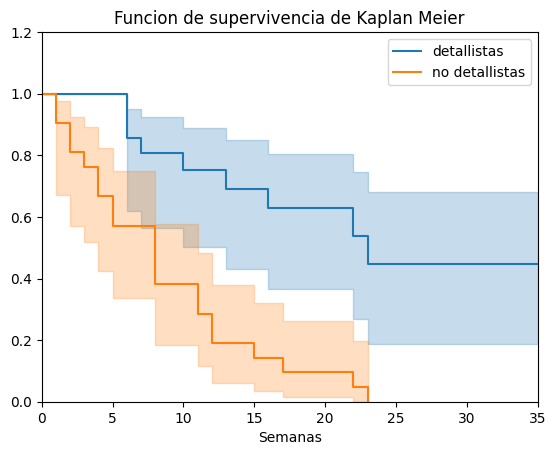

In [26]:
km_deta.plot_survival_function(label='detallistas')
km_nodeta.plot_survival_function(label='no detallistas')
plt.xlim(0,35)
plt.ylim(0,1.2)
plt.xlabel('Semanas')
plt.title('Funcion de supervivencia de Kaplan Meier')

Prueba de hipótesis (log rank test)

$Ho: S(1)=S(2)$ funciones de supervivencia iguales\
$Ha_ S(1)\neq S(2)$ funciones de supervivencia distintas

In [28]:
LRT=logrank_test(detallistas['t'],no_detallistas['t'], detallistas['estado'], no_detallistas['estado'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [29]:
LRT.p_value.round(2)

0.0

Con un $\alpha=0.5$ Rechazamos Ho, entonces las funciones de supervivencia son distintas, la relacion de los detallistas dura mas que las de los no detallistas

In [30]:
km_deta.median_survival_time_

23.0

In [31]:
km_nodeta.median_survival_time_

8.0

La mitad de las relaciones de los no detallistas duran menos de 8 semanas y la mitad de las relaciones de los detallistas duran 23 semanas